# Integration

## Inhalt
* [Defintionen](#Defintionen)
* [Bestimmte Integrale](#Bestimmte-Integrale)
* [Unbestimmte Integrale](#Unbestimmte-Integrale)
* [Numerische Integration](#Numerische-Integration)


### Definitionen

* Sei $[a,b]$ ein Intervall. Gilt $a=a_0 < a_1 <a_2 < \dots < a_n=b$, so nennt man $Z=(a_0, \dots ,a_n)$ eine <em>Zerlegung</em> von $[a,b]$.
* Eine Funktion $\phi:[a,b] \rightarrow \mathbb{R}$ hei&szlig;t <em>Treppenfunktion</em>, wenn es eine Zerlegung $Z$ von $[a,b]$ gibt, so dass $\phi$ konstant ist auf jedemTeilintervall $(a_i,a_{i+1})$ von $Z$.
* Wir erkl&auml;ren das Integral einer Treppenfunktion $\phi$ durch $$\int_Z \phi := \sum_{k=1}^n c_k (a_k -a_{k-1}).$$ Dabei ist $Z$ die zugeh&ouml;rige Zerlegung und $c_k=\phi(x)$, $x\in (a_{k-1},a_k)$.
* Die Menge aller Treppenfunktionen auf $[a,b]$ sei $T[a,b]$.

F&uuml;r eine beschr&auml;nkte Funktion $f[a,b]\rightarrow \mathbb{R}$ hei&szlig;t 
$$ \int^*f:= \inf \{ \int \psi \ | \ \psi \in T[a,b], f \leq \psi \}. $$ 
das <strong>Oberintegral</strong> und 
$$\int_*f:= \sup \{ \int \psi \ | \ \psi \in T[a,b], f \geq \psi \}.$$
das <strong>Unterintegral</strong>. Es gilt f&uuml;r $\phi, \psi \in T[a,b]$ mit $\phi \leq f \leq \psi$ die Ungleichung $$ \int \phi \leq \int_* f \leq \int^* f \leq \int \psi.$$

**Das Riemannsche Integral** Eine beschr&auml;nkte Funktion $f:[a,b] \rightarrow \mathbb{R}$ hei&szlig;t <em>integrierbar</em>, wenn Ober- und Unterintegral von $f$ auf $[a,b]$ &uuml;bereinstimmen. 

Der gemeinsame Wert hei&szlig;t das <em>Integral</em> von $f$ und wird mit $$ \int_a^b f(x)dx $$ bezeichnet.
($f$ der Integrand, $x$ Integrationsvariable, $a$, $b$ Integrationsgrenzen).


#### Riemann-Summe und visuelle Darstellung derselben  

In [1]:
f = piecewise([[(-pi,0),cos(x)]]); f

piecewise(x|-->cos(x) on (-pi, 0); x)

In [1]:
def riemann_sum_mp(f, a, b, n):
    # Calculates the Riemann-sum of f in the interval (a, b) using n steps
    step_size = (b-a)*1.0/n
    x_values = [(a+step_size*i).n() for i in range(n+1)] # Calculates the sub-intervals
    # Calculates the function-value at the midpoints of the intervals, weighted by stepsize
    values_mp = [(f((x_values[i]+x_values[i+1])/2)).n() for i in range(n)]
    y_mp = zip(zip(x_values[0:(n)], x_values[1:(n+1)]), values_mp)
    return y_mp, (step_size*sum(values_mp)).n()

In [1]:
rsf = riemann_sum_mp(f,-pi,0,5) ; show(rsf)

([((-3.14159265358979, -2.51327412287183), -0.951056516295154),
  ((-2.51327412287183, -1.88495559215388), -0.587785252292473),
  ((-1.88495559215388, -1.25663706143592), 6.12323399573677e-17),
  ((-1.25663706143592, -0.628318530717959), 0.587785252292473),
  ((-0.628318530717959, 0.000000000000000), 0.951056516295154)],
 2.79029479840691e-16)

In [1]:
show([[c,(a,b)] for (a,b),c in rsf[0]])

[[-0.951056516295154, (-3.14159265358979, -2.51327412287183)],
 [-0.587785252292473, (-2.51327412287183, -1.88495559215388)],
 [6.12323399573677e-17, (-1.88495559215388, -1.25663706143592)],
 [0.587785252292473, (-1.25663706143592, -0.628318530717959)],
 [0.951056516295154, (-0.628318530717959, 0.000000000000000)]]

Patternmatching nochmal im Detail

In [1]:
show(rsf[0])
(a,c),b = rsf[0][0]; show(b,c,a)

[((-3.14159265358979, -2.51327412287183), -0.951056516295154),
 ((-2.51327412287183, -1.88495559215388), -0.587785252292473),
 ((-1.88495559215388, -1.25663706143592), 6.12323399573677e-17),
 ((-1.25663706143592, -0.628318530717959), 0.587785252292473),
 ((-0.628318530717959, 0.000000000000000), 0.951056516295154)]

-0.951056516295154 -2.51327412287183 -3.14159265358979

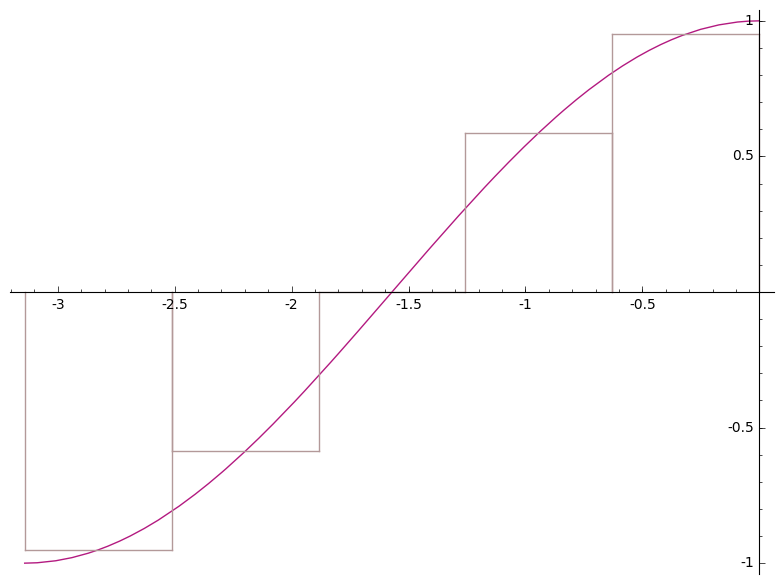

In [1]:
grey = (0.7,0.6,0.6)
P = f.plot((-pi,0),rgbcolor=(0.7,0.1,0.5), plot_points=40)
L = add([line([[b,0],[b,g]],rgbcolor=grey) 
         + line([[a,0],[a,g]],rgbcolor=grey) 
         + line([[a,g],[b,g]],rgbcolor=grey) for (a,b),g in rsf[0]])
(P + L).show()

### Bestimmte Integrale



der Form $$\int_a^b f(x) dx$$  


``` python
integrate(<f>,<x>,<a>,<b>)
```
Dabei ist <f> ein Ausdruck.  

In [1]:
integrate(sin(x),x,0,6)

-cos(6) + 1

In [1]:
integrate(exp(x)*x,x,2,3)

2*e^3 - e^2

In [1]:
integrate(1/x^2,x,1,oo)

1

### Unbestimmte Integrale

Stammfunktion $F$: Ist $f$ stetig auf einem Intervall $I$ und $a \in I$, so ist 
$$F(x)= \int_a^x f(t) dt, x \in I $$ eine differenzierbare Funktion mit                       
$F\,'(x)=f(x)$.        

Unbestimmtes Integral: alternative Notation für eine Stammfunktion $F$:  $$\int f(
x) dx$$            

``` python
integrate(<f>,<x>)
```

In [1]:
integrate(exp(x)*x,x)

(x - 1)*e^x

In [1]:
reset();var('a,b')
integrate(x^a*b,x)

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(a>0)', see `assume?` for more details)
Is a equal to -1?

In [1]:
reset();var('a,b')
assume(a<>-1)
integrate(x^a*b,x)

b*x^(a + 1)/(a + 1)

In [1]:
forget();
assume(a==-1)
integrate(x^a*b,x)

b*log(x)

### Numerische Integration

von $$\int_a^b f(x) dx$$

``` python
numerical_integral(<f>,<a>,<b>)
```

In [1]:
numerical_integral(sin(1/x)*x,1,2)

(0.9190591675987025, 1.0203606488609102e-14)

Das gleiche symbolisch  

In [1]:
integrate(sin(1/x)*x,x,1,2)

1/4*I*Ei(I) - 1/4*I*Ei(1/2*I) + 1/4*I*Ei(-1/2*I) - 1/4*I*Ei(-I) - 1/2*cos(1) + cos(1/2) - 1/2*sin(1) + 2*sin(1/2)